In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('C:/Users/HP/Downloads/student-data.csv')

In [3]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,passed
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,no,4,3,4,1,1,3,6,no
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,no,5,3,3,1,1,3,4,no
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,no,4,3,2,2,3,3,10,yes
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,3,2,2,1,1,5,2,yes
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,no,4,3,2,1,2,5,4,yes


In [4]:
df.tail()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,passed
390,MS,M,20,U,LE3,A,2,2,services,services,...,no,no,5,5,4,4,5,4,11,no
391,MS,M,17,U,LE3,T,3,1,services,services,...,yes,no,2,4,5,3,4,2,3,yes
392,MS,M,21,R,GT3,T,1,1,other,other,...,no,no,5,5,3,3,3,3,3,no
393,MS,M,18,R,LE3,T,3,2,services,other,...,yes,no,4,4,1,3,4,5,0,yes
394,MS,M,19,U,LE3,T,1,1,other,at_home,...,yes,no,3,2,3,3,3,5,5,no


In [5]:
df.shape

(395, 31)

In [6]:
df.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
passed        0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 31 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

# Feature Engineering 

In [8]:
#ADD MOTHER'S EDUCATION AND FATHER'S EDUCATION AS PARENTS'S EDUCATION

df['pedu']=df['Medu']+df['Fedu']

In [9]:
#DROP MOTHER'S EDUCATION AND FATHER'S EDUCATION COLUMNS

df=df.drop(['Medu','Fedu'],axis=1)

In [10]:
#ENCODE MJOB AND FJOB COLUMNS

df['Mjob']=df['Mjob'].map({'at_home':1, 'health':2, 'other':3, 'services':4, 'teacher':5})
df['Fjob']=df['Fjob'].map({'at_home':1, 'health':2, 'other':3, 'services':4, 'teacher':5})

In [11]:
#ADD MOTHER'S JOB AND FATHER'S JOB AS PARENT'S JOB

df['pjob']=df['Mjob']+df['Fjob']

In [12]:
#DROP MOTHER'S EDUCATION AND FATHER'S EDUCATION COLUMNS

df=df.drop(['Mjob','Fjob'],axis=1)

In [13]:
#ONE HOT ENCODING THE CATEGORICAL DATA INTO NUMERICAL DATA

df['school']=pd.get_dummies(df['school'],drop_first=True)
df['sex']=pd.get_dummies(df['sex'],drop_first=True)
df['address']=pd.get_dummies(df['address'],drop_first=True)
df['famsize']=pd.get_dummies(df['famsize'],drop_first=True)
df['schoolsup']=pd.get_dummies(df['schoolsup'],drop_first=True)
df['famsup']=pd.get_dummies(df['famsup'],drop_first=True)
df['paid']=pd.get_dummies(df['paid'],drop_first=True)
df['activities']=pd.get_dummies(df['activities'],drop_first=True)
df['nursery']= pd.get_dummies(df['nursery'],drop_first=True)
df['internet']=pd.get_dummies(df['internet'],drop_first=True)
df['romantic']=pd.get_dummies(df['romantic'],drop_first=True)
df['Pstatus']=pd.get_dummies(df['Pstatus'],drop_first=True)

In [14]:
df['higher']=pd.get_dummies(df['higher'],drop_first=True)
df['reason']=df['reason'].map({'course':0, 'other':1, 'home':2, 'reputation':3})
df['guardian']=df['guardian'].map({'mother':0,'father':1,'other':2})
df['passed']=pd.get_dummies(df['passed'],drop_first=True)

In [15]:
df.head()

,school,sex,age,address,famsize,Pstatus,reason,guardian,traveltime,studytime,...,famrel,freetime,goout,Dalc,Walc,health,absences,passed,pedu,pjob
0,0,0,18,1,0,0,0,0,2,2,...,4,3,4,1,1,3,6,0,8,6
1,0,0,17,1,0,1,0,1,1,2,...,5,3,3,1,1,3,4,0,2,4
2,0,0,15,1,1,1,1,0,1,2,...,4,3,2,2,3,3,10,1,2,4
3,0,0,15,1,0,1,2,0,1,3,...,3,2,2,1,1,5,2,1,6,6
4,0,0,16,1,0,1,2,1,1,2,...,4,3,2,1,2,5,4,1,6,6


In [16]:
#Add workday alcohol consumption and weekend alcohol consumption as total alcohol consumption (talc)

df['Talc']=df['Dalc']+df['Walc']

In [17]:
#DROP Dalc AND Walc COLUMNS

df=df.drop(['Dalc','Walc'],axis=1)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 28 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   school      395 non-null    uint8
 1   sex         395 non-null    uint8
 2   age         395 non-null    int64
 3   address     395 non-null    uint8
 4   famsize     395 non-null    uint8
 5   Pstatus     395 non-null    uint8
 6   reason      395 non-null    int64
 7   guardian    395 non-null    int64
 8   traveltime  395 non-null    int64
 9   studytime   395 non-null    int64
 10  failures    395 non-null    int64
 11  schoolsup   395 non-null    uint8
 12  famsup      395 non-null    uint8
 13  paid        395 non-null    uint8
 14  activities  395 non-null    uint8
 15  nursery     395 non-null    uint8
 16  higher      395 non-null    uint8
 17  internet    395 non-null    uint8
 18  romantic    395 non-null    uint8
 19  famrel      395 non-null    int64
 20  freetime    395 non-null    int6

In [19]:
x=df.drop('passed',axis=1)

In [20]:
y=df['passed']

In [21]:
#SPLITTING THE DATASET

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,random_state=2,test_size=0.3)

# MODEL 1: LOGISTIC REGRESSION MODEL

In [22]:
from sklearn.linear_model import LogisticRegression
logit_model=LogisticRegression()
logit_model.fit(x_train,y_train)
y_pred_lm=logit_model.predict(x_test)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [23]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
print("Accuracy is ",accuracy_score(y_test,y_pred_lm))
print("f1 score is ",f1_score(y_test,y_pred_lm))
print("Confusion Matrix \n",confusion_matrix(y_test,y_pred_lm))

Accuracy is  0.7142857142857143
f1 score is  0.8023255813953489
Confusion Matrix 
 [[16 23]
 [11 69]]


# MODEL 2: DECISION TREE MODEL

In [24]:
from sklearn.tree import DecisionTreeClassifier
dt_model=DecisionTreeClassifier()
dt_model.fit(x_train,y_train)
y_pred_dt=dt_model.predict(x_test)

In [25]:
print("Accuracy is ",accuracy_score(y_test,y_pred_dt))
print("f1 score is ",f1_score(y_test,y_pred_dt))
print("Confusion Matrix \n",confusion_matrix(y_test,y_pred_dt))

Accuracy is  0.6470588235294118
f1 score is  0.7307692307692308
Confusion Matrix 
 [[20 19]
 [23 57]]


# MODEL 3: SVM MODEL

In [26]:
from sklearn.svm import SVC
svm_linear=SVC(kernel='linear')
svm_linear.fit(x_train,y_train)
y_pred_svm=svm_linear.predict(x_test)

In [27]:
print("Accuracy is ",accuracy_score(y_test,y_pred_svm))
print("f1 score is ",f1_score(y_test,y_pred_svm))
print("Confusion Matrix \n",confusion_matrix(y_test,y_pred_svm))

Accuracy is  0.7226890756302521
f1 score is  0.8156424581005587
Confusion Matrix 
 [[13 26]
 [ 7 73]]


# MODEL 4: RANDOM FOREST MODEL

In [28]:
from sklearn.ensemble import RandomForestClassifier
r_forest=RandomForestClassifier()
r_forest.fit(x_train,y_train)
y_pred_rt=r_forest.predict(x_test)

In [29]:
print("Accuracy is ",accuracy_score(y_test,y_pred_rt))
print("f1 score is ",f1_score(y_test,y_pred_rt))
print("Confusion Matrix \n",confusion_matrix(y_test,y_pred_rt))

Accuracy is  0.6890756302521008
f1 score is  0.7978142076502732
Confusion Matrix 
 [[ 9 30]
 [ 7 73]]


In [30]:
f_imp=pd.Series(r_forest.feature_importances_,index=x.columns).sort_values(ascending=False)*100

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26]),
 [Text(0, 0, 'failures'),
  Text(1, 0, 'absences'),
  Text(2, 0, 'age'),
  Text(3, 0, 'pedu'),
  Text(4, 0, 'pjob'),
  Text(5, 0, 'Talc'),
  Text(6, 0, 'goout'),
  Text(7, 0, 'health'),
  Text(8, 0, 'freetime'),
  Text(9, 0, 'studytime'),
  Text(10, 0, 'reason'),
  Text(11, 0, 'famrel'),
  Text(12, 0, 'traveltime'),
  Text(13, 0, 'romantic'),
  Text(14, 0, 'activities'),
  Text(15, 0, 'schoolsup'),
  Text(16, 0, 'famsize'),
  Text(17, 0, 'sex'),
  Text(18, 0, 'guardian'),
  Text(19, 0, 'internet'),
  Text(20, 0, 'paid'),
  Text(21, 0, 'famsup'),
  Text(22, 0, 'higher'),
  Text(23, 0, 'address'),
  Text(24, 0, 'Pstatus'),
  Text(25, 0, 'nursery'),
  Text(26, 0, 'school')])

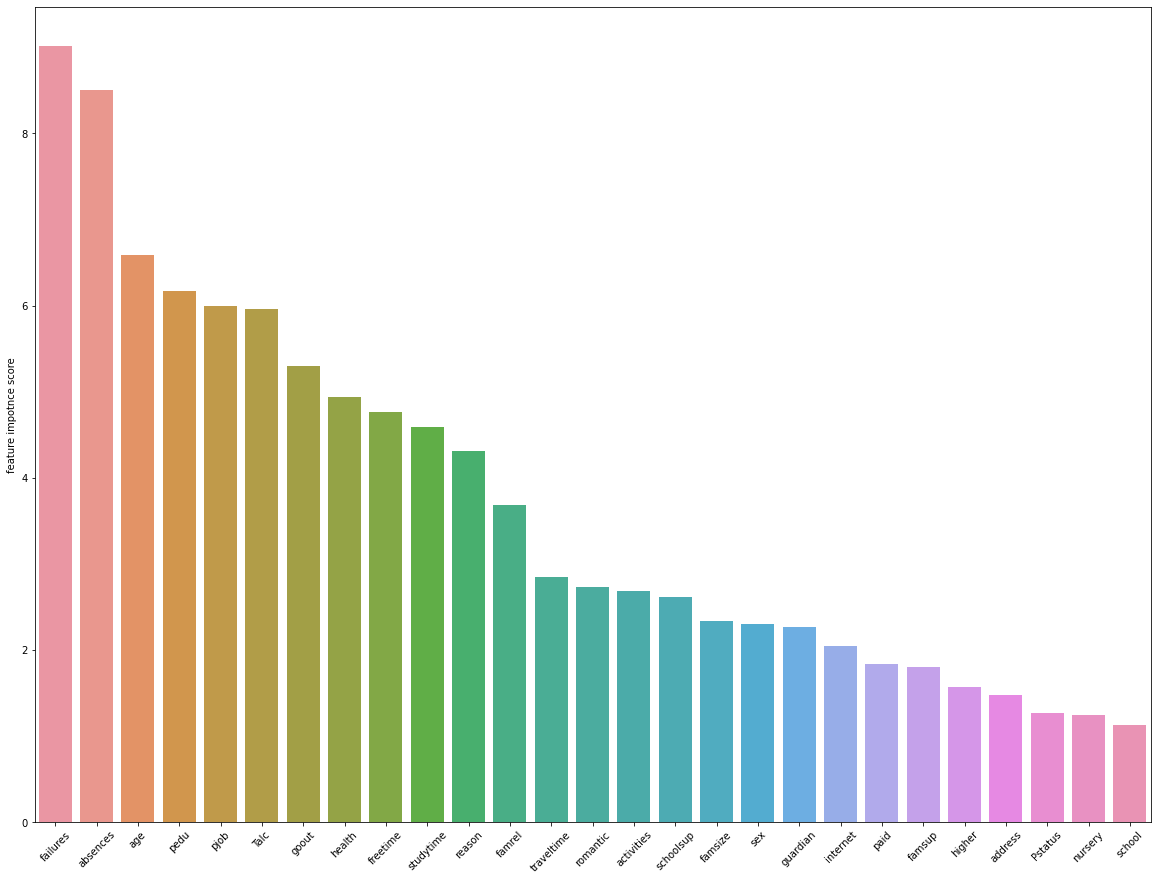

In [31]:
plt.figure(figsize=(20,15))
sns.barplot(x=f_imp.index,y=f_imp)
plt.xlabel=('features')
plt.ylabel('feature impotnce score')
plt.xticks(rotation=45)

# MODEL 4: K NN MODEL

In [32]:
from sklearn.neighbors import KNeighborsClassifier
acc_values=[]
neighbours=np.arange(3,15)
for k in neighbours:
    classifier=KNeighborsClassifier(n_neighbors=k,metric='minkowski')
    classifier.fit(x_train,y_train)
    y_pred=classifier.predict(x_test)
    acc=accuracy_score(y_test,y_pred)
    acc_values.append(acc)
acc_values

[0.6554621848739496,
 0.6386554621848739,
 0.6890756302521008,
 0.6974789915966386,
 0.7478991596638656,
 0.7142857142857143,
 0.6890756302521008,
 0.6890756302521008,
 0.7058823529411765,
 0.7142857142857143,
 0.6974789915966386,
 0.7142857142857143]

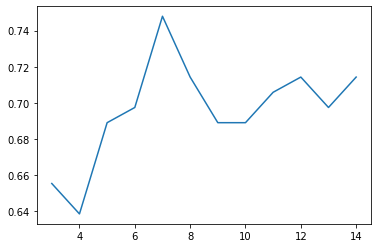

In [33]:
plt.plot(neighbours,acc_values)
#plt.xlabel('neighbours')
#plt.ylabel('acc_values')

In [34]:
classifier=KNeighborsClassifier(n_neighbors=7,metric='minkowski')
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)

In [35]:
print("Accuracy is ",accuracy_score(y_test,y_pred))
print("f1 score is ",f1_score(y_test,y_pred))
print("Confusion Matrix \n",confusion_matrix(y_test,y_pred))

Accuracy is  0.7478991596638656
f1 score is  0.8295454545454546
Confusion Matrix 
 [[16 23]
 [ 7 73]]


In [36]:
print("Accuracy of LogisticRegression ",accuracy_score(y_test,y_pred_lm))
print("f1 score of LogisticRegression ",f1_score(y_test,y_pred_lm))
print("Accuracy of Decision Tree model ",accuracy_score(y_test,y_pred_dt))
print("f1 score of Decision Tree model ",f1_score(y_test,y_pred_dt))
print("Accuracy of svm ",accuracy_score(y_test,y_pred_svm))
print("f1 score of svm ",f1_score(y_test,y_pred_svm))
print("Accuracy of Random Forest model ",accuracy_score(y_test,y_pred_rt))
print("f1 score of Random Forest model ",f1_score(y_test,y_pred_rt))
print("Accuracy of K NN model ",accuracy_score(y_test,y_pred))
print("f1 score of K NN model ",f1_score(y_test,y_pred))

Accuracy of LogisticRegression  0.7142857142857143
f1 score of LogisticRegression  0.8023255813953489
Accuracy of Decision Tree model  0.6470588235294118
f1 score of Decision Tree model  0.7307692307692308
Accuracy of svm  0.7226890756302521
f1 score of svm  0.8156424581005587
Accuracy of Random Forest model  0.6890756302521008
f1 score of Random Forest model  0.7978142076502732
Accuracy of K NN model  0.7478991596638656
f1 score of K NN model  0.8295454545454546


By analyzing the accuracy,f1_score and confusion matrix of the 5 models (LogisticRegression,Decision Tree model,svm,Random Forest model,K NN model),    
it is clear that K NN Model is the best suited for the prediction